microToolsTest
Basic demo of the microTools module showing how to import some data, make plots, etc.

Ira Thorpe
2018-06-04

In [1]:
%matplotlib notebook
# import
import numpy as np
import os
import pathlib
import healpy as hp
import pickle
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import microTools
import datetime
import pandas as pd

import patch3dfunc




#%matplotlib inline

In [2]:
# pick a segment time and load the data 
segment = 1147740231

# setup directory structure
p = pathlib.PurePath(os.getcwd())
baseDir = str(p.parent)

# load GRS1
chainFile = baseDir + '/data/' + str(segment) + '_grs1.pickle'
fid = open(chainFile,'rb')
data1 = pickle.load(fid)
fid.close()

# load GRS2
chainFile = baseDir + '/data/' + str(segment) +'_grs2.pickle'
if os.path.exists(chainFile) :
    fid = open(chainFile,'rb')
    data2 = pickle.load(fid)
    fid.close()

# make plot directory
plotDir = baseDir+'/plots/'+str(segment)
if not os.path.exists(plotDir):
    os.makedirs(plotDir)

<IPython.core.display.Javascript object>


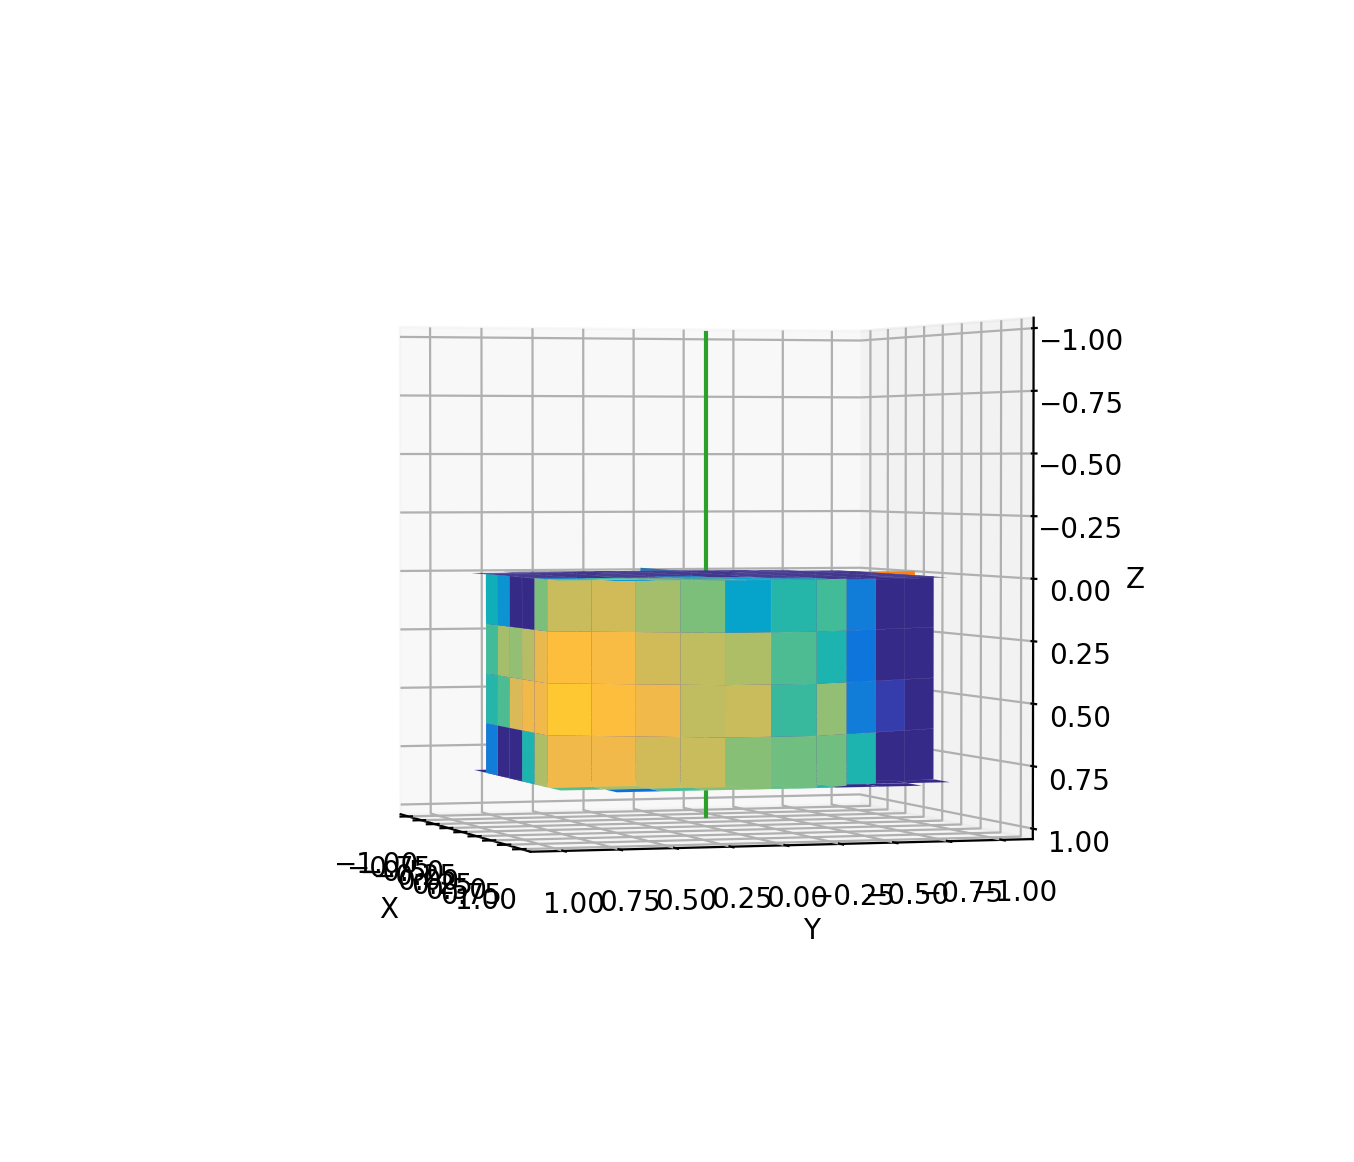

/Users/shouriha/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:486: UserWarning: Warning: converting a masked element to nan.
  xa = np.array([X])


In [3]:
df = pd.DataFrame(data1)
# converts new naming conventions to old
df = df.rename(columns={'rx': 'xloc', 'ry' : 'yloc', 'rz' : 'zloc', 'N' : 'impactnum'})

fig3d, ax = patch3dfunc.patch3d_LPF(df, scale = 'log')


In [4]:
#pickle.dump(fig3d, open('FigureObject.pickle', 'wb'))
output = open('FigureObject.pickle', 'wb')
pickle.dump(fig3d, output)
output.close()

<IPython.core.display.Javascript object>


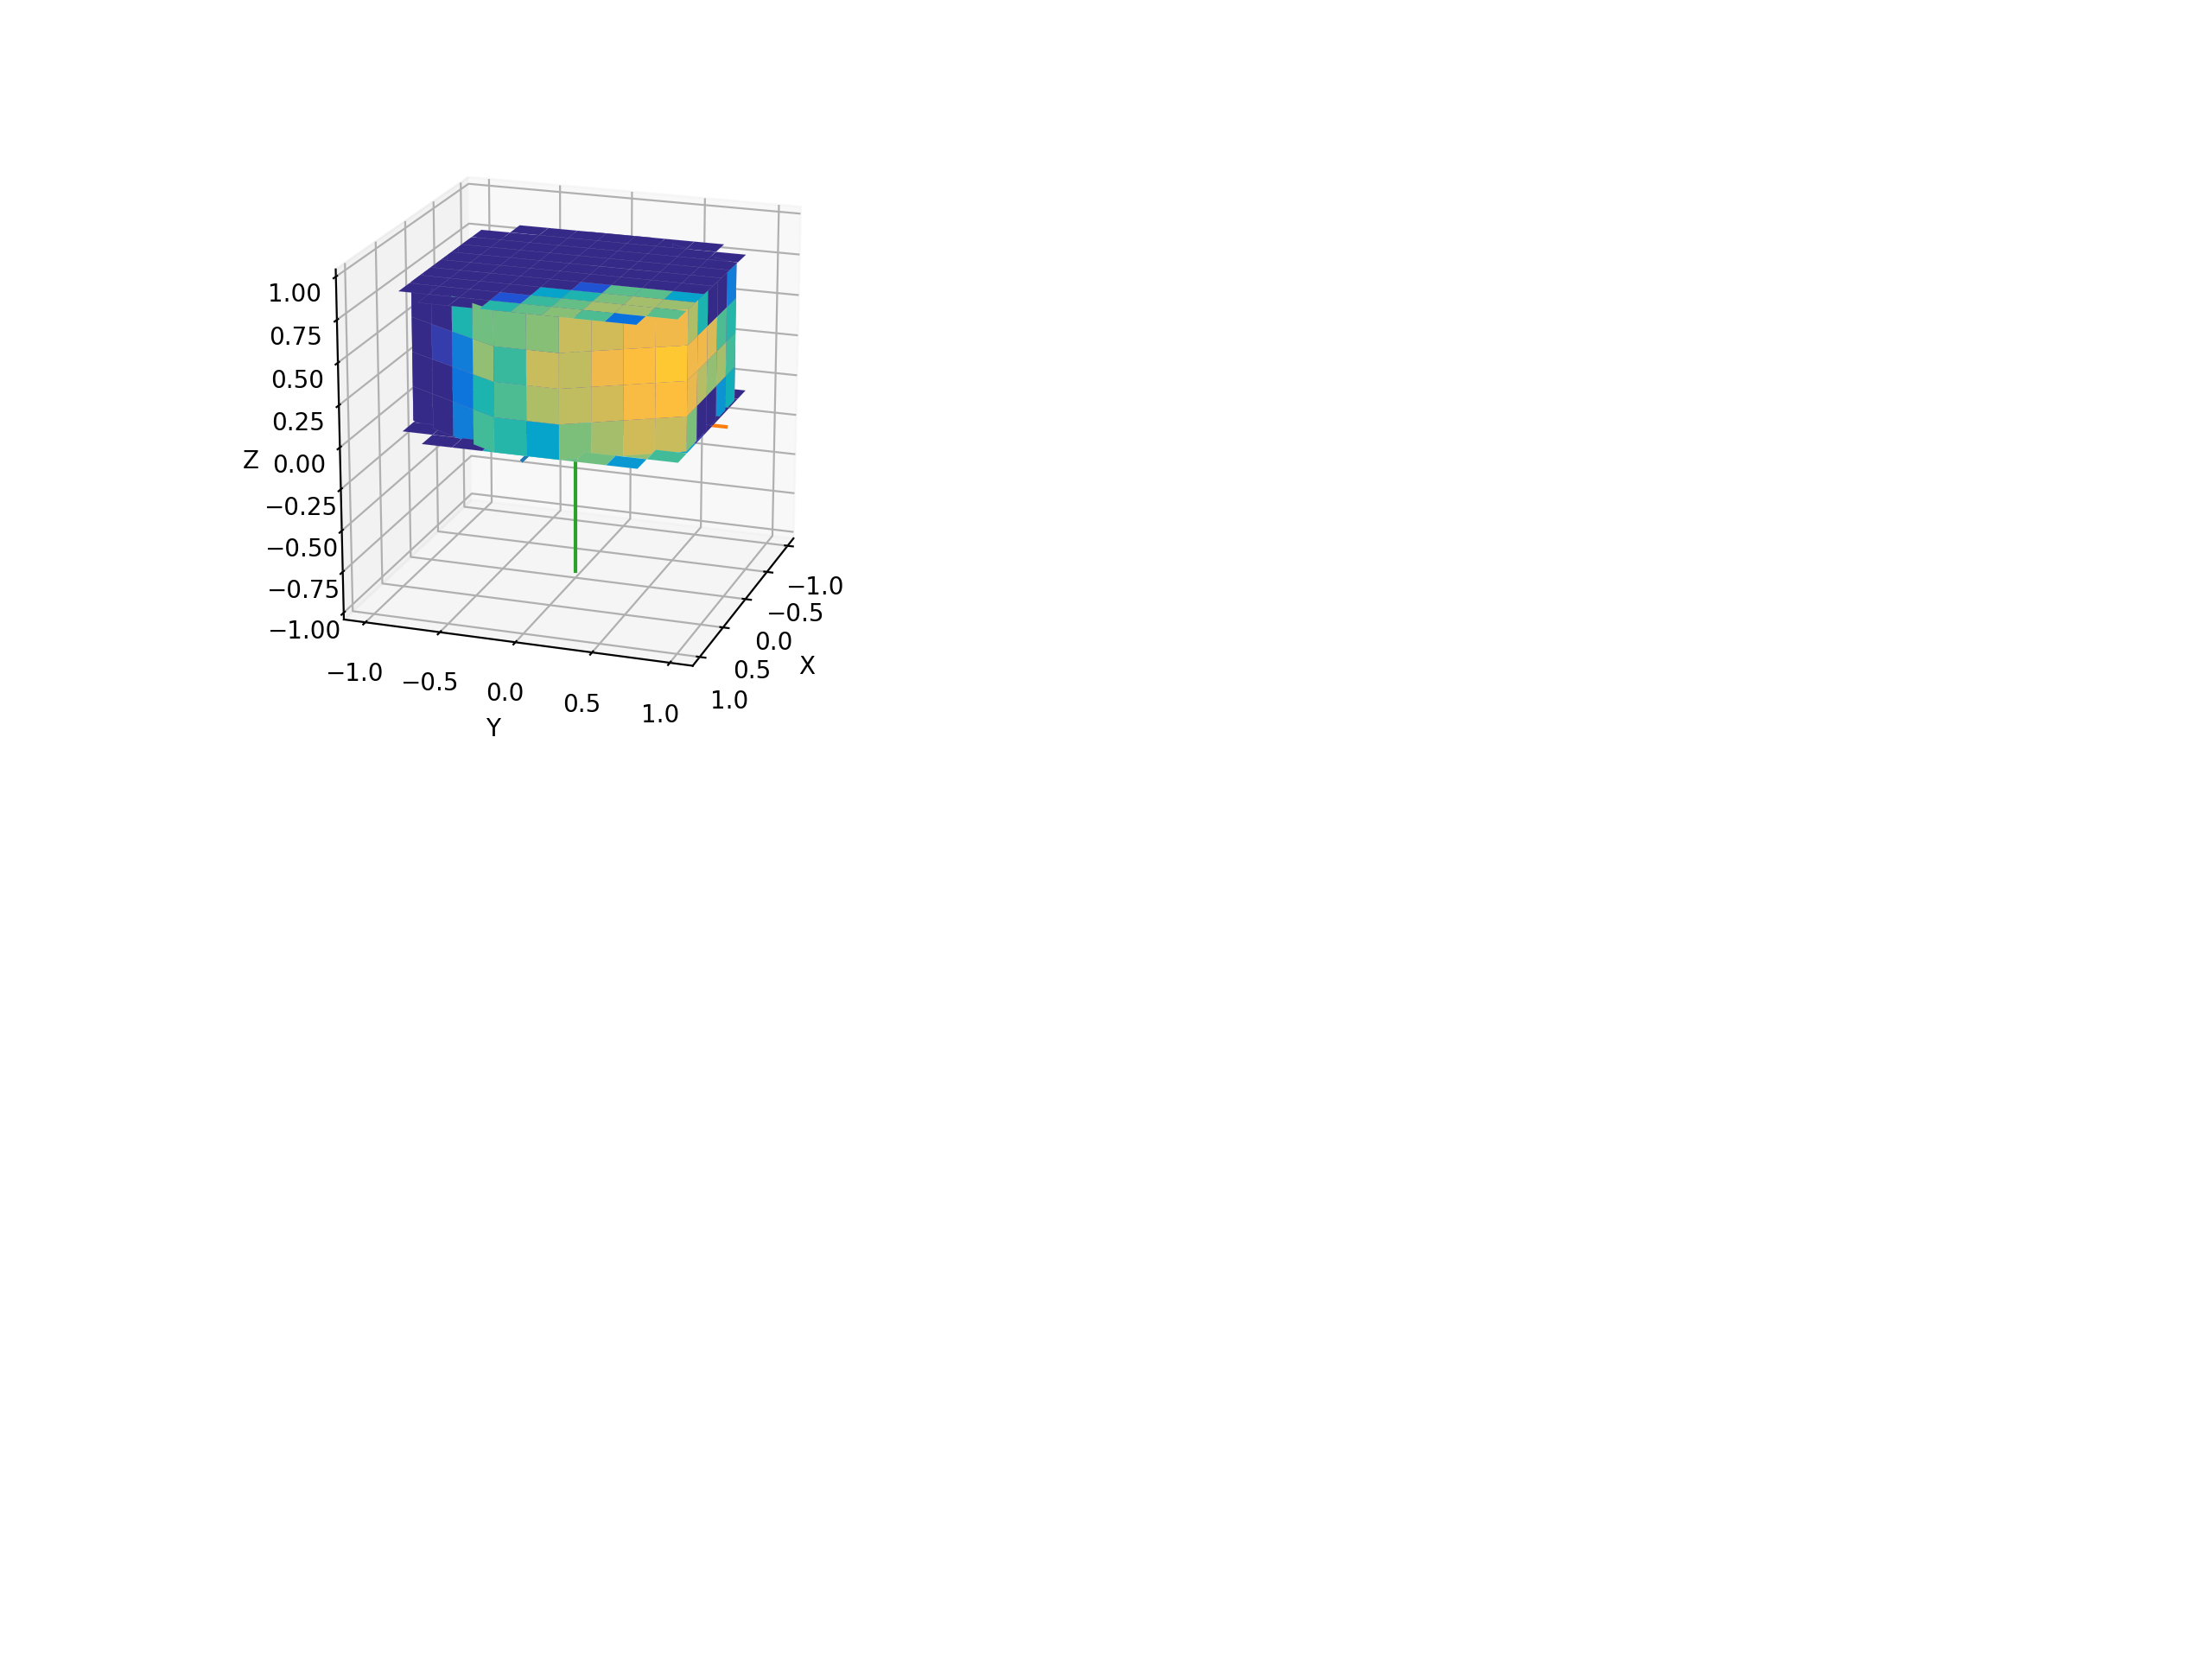

In [5]:
figx = pickle.load(open('FigureObject.pickle', 'rb'))

#figx.show()

GRS 1


<IPython.core.display.Javascript object>


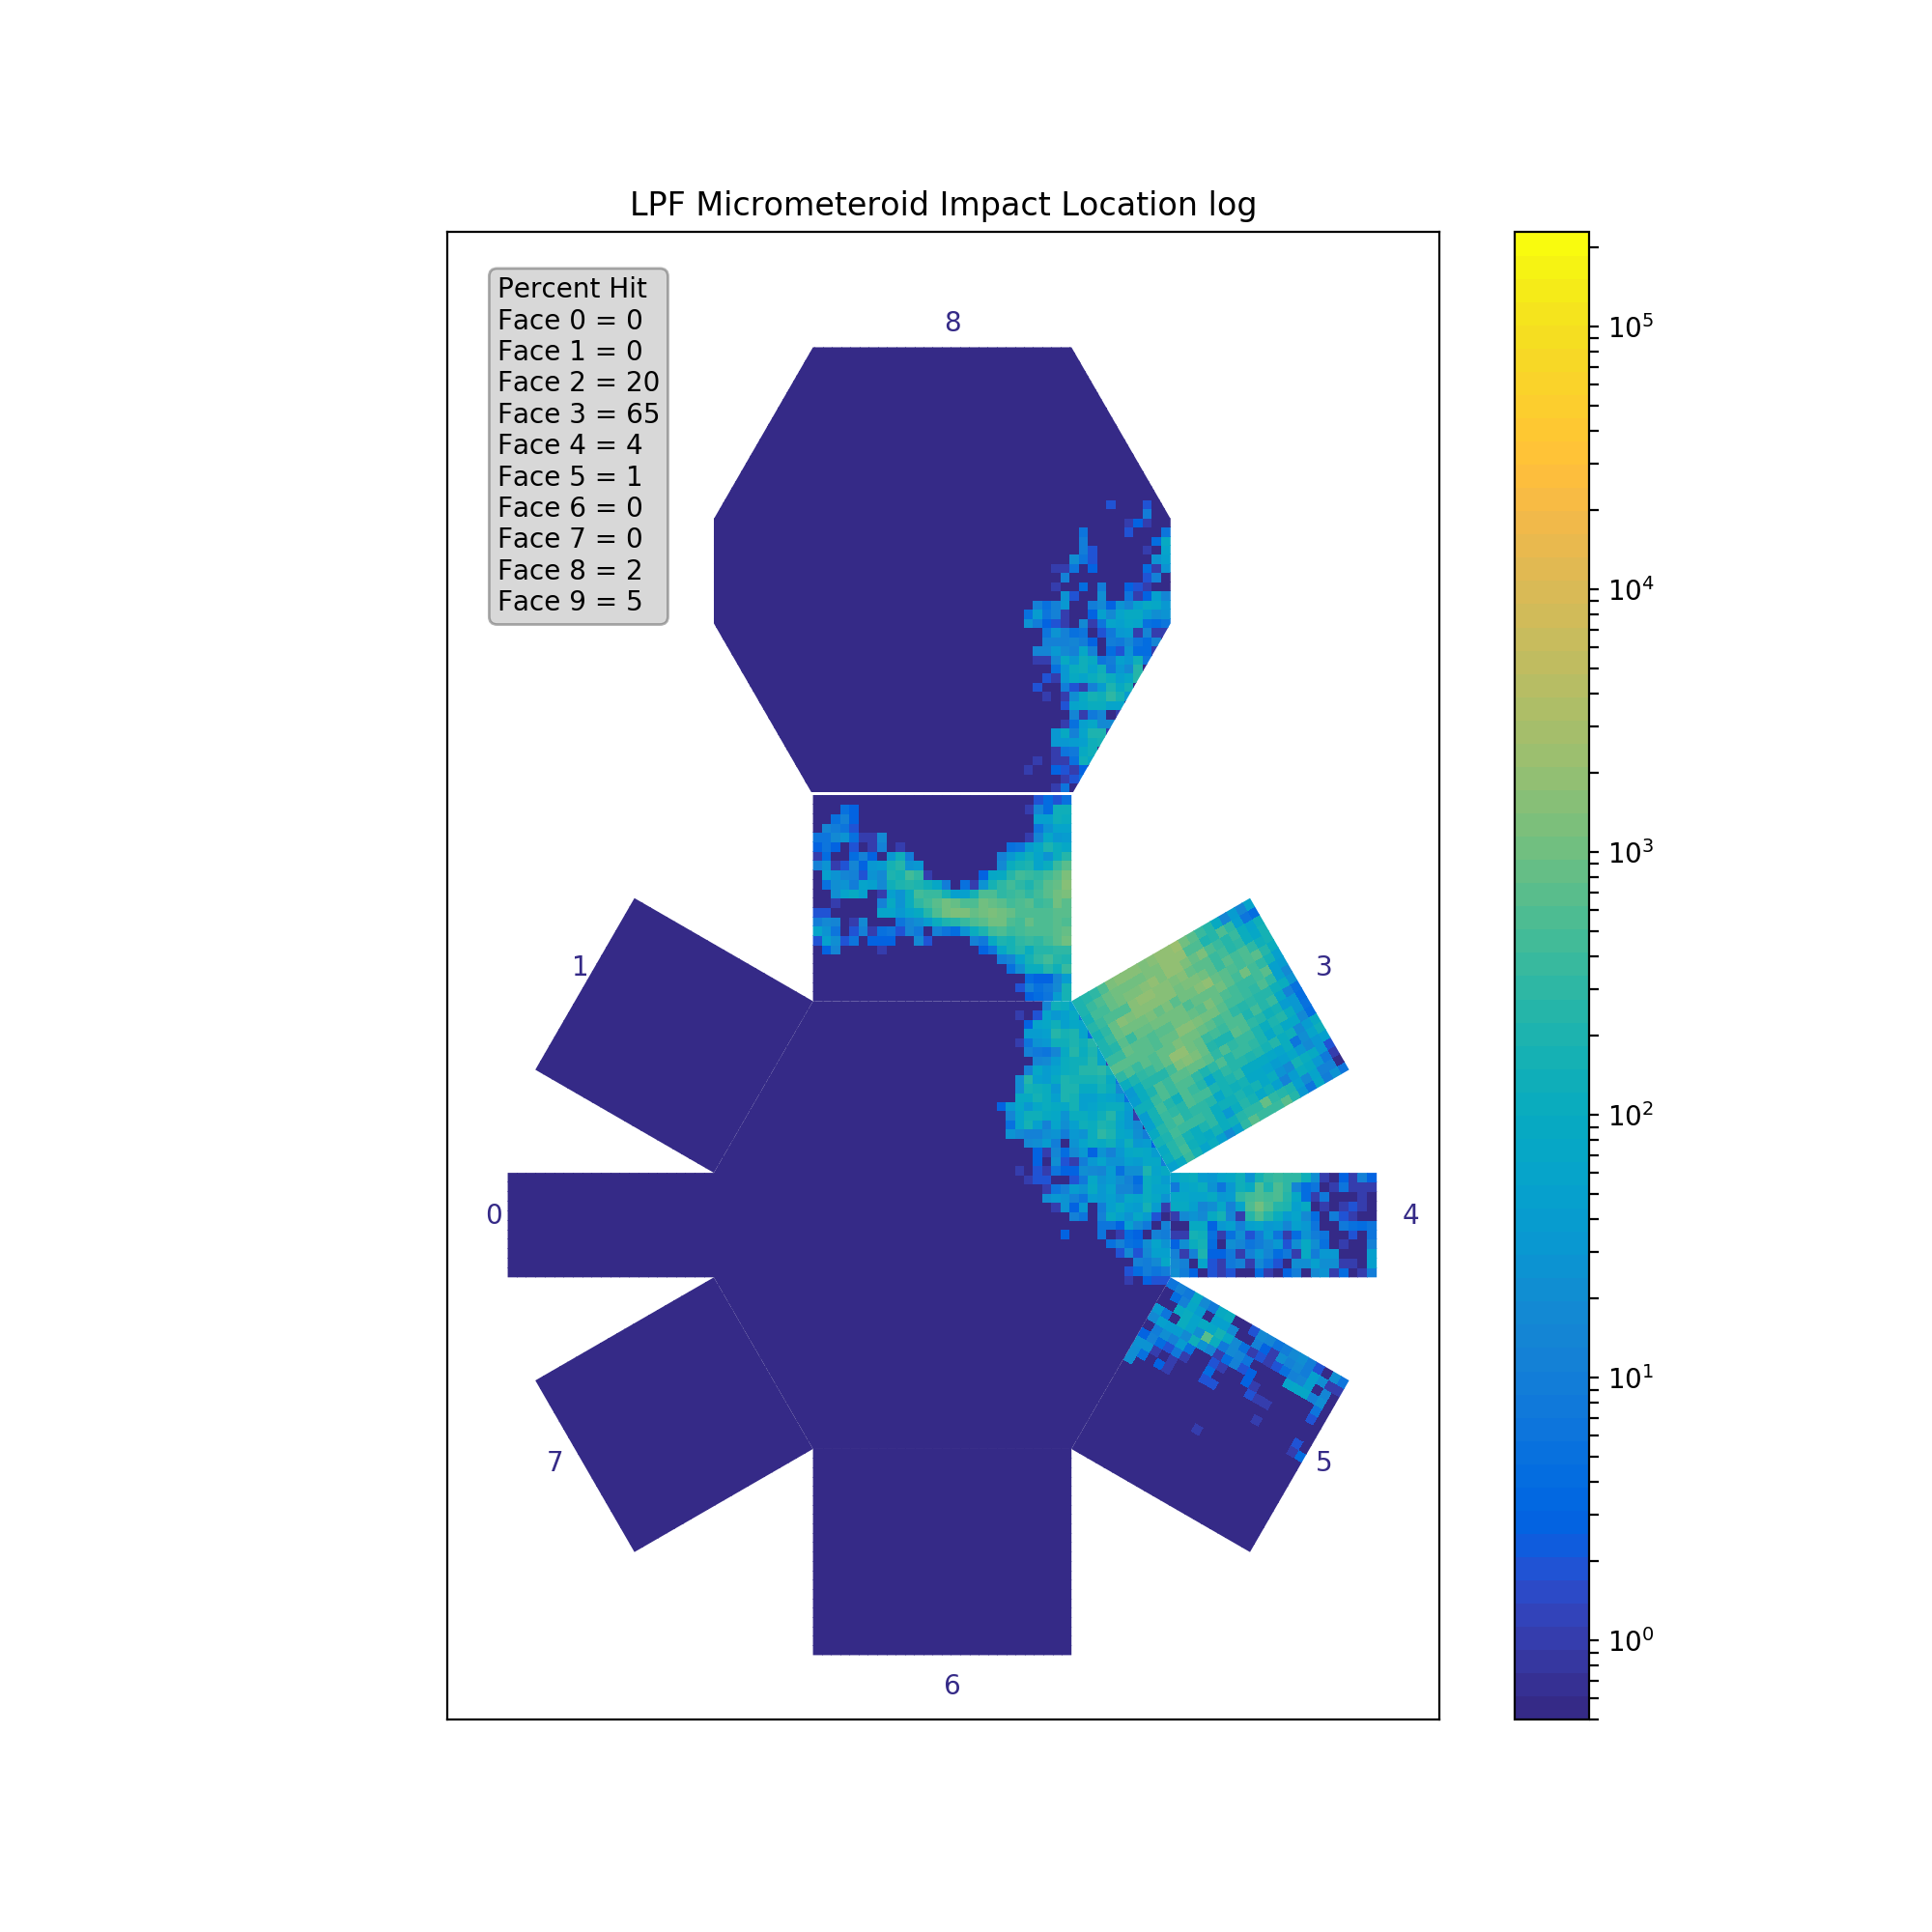

GRS 2


<IPython.core.display.Javascript object>


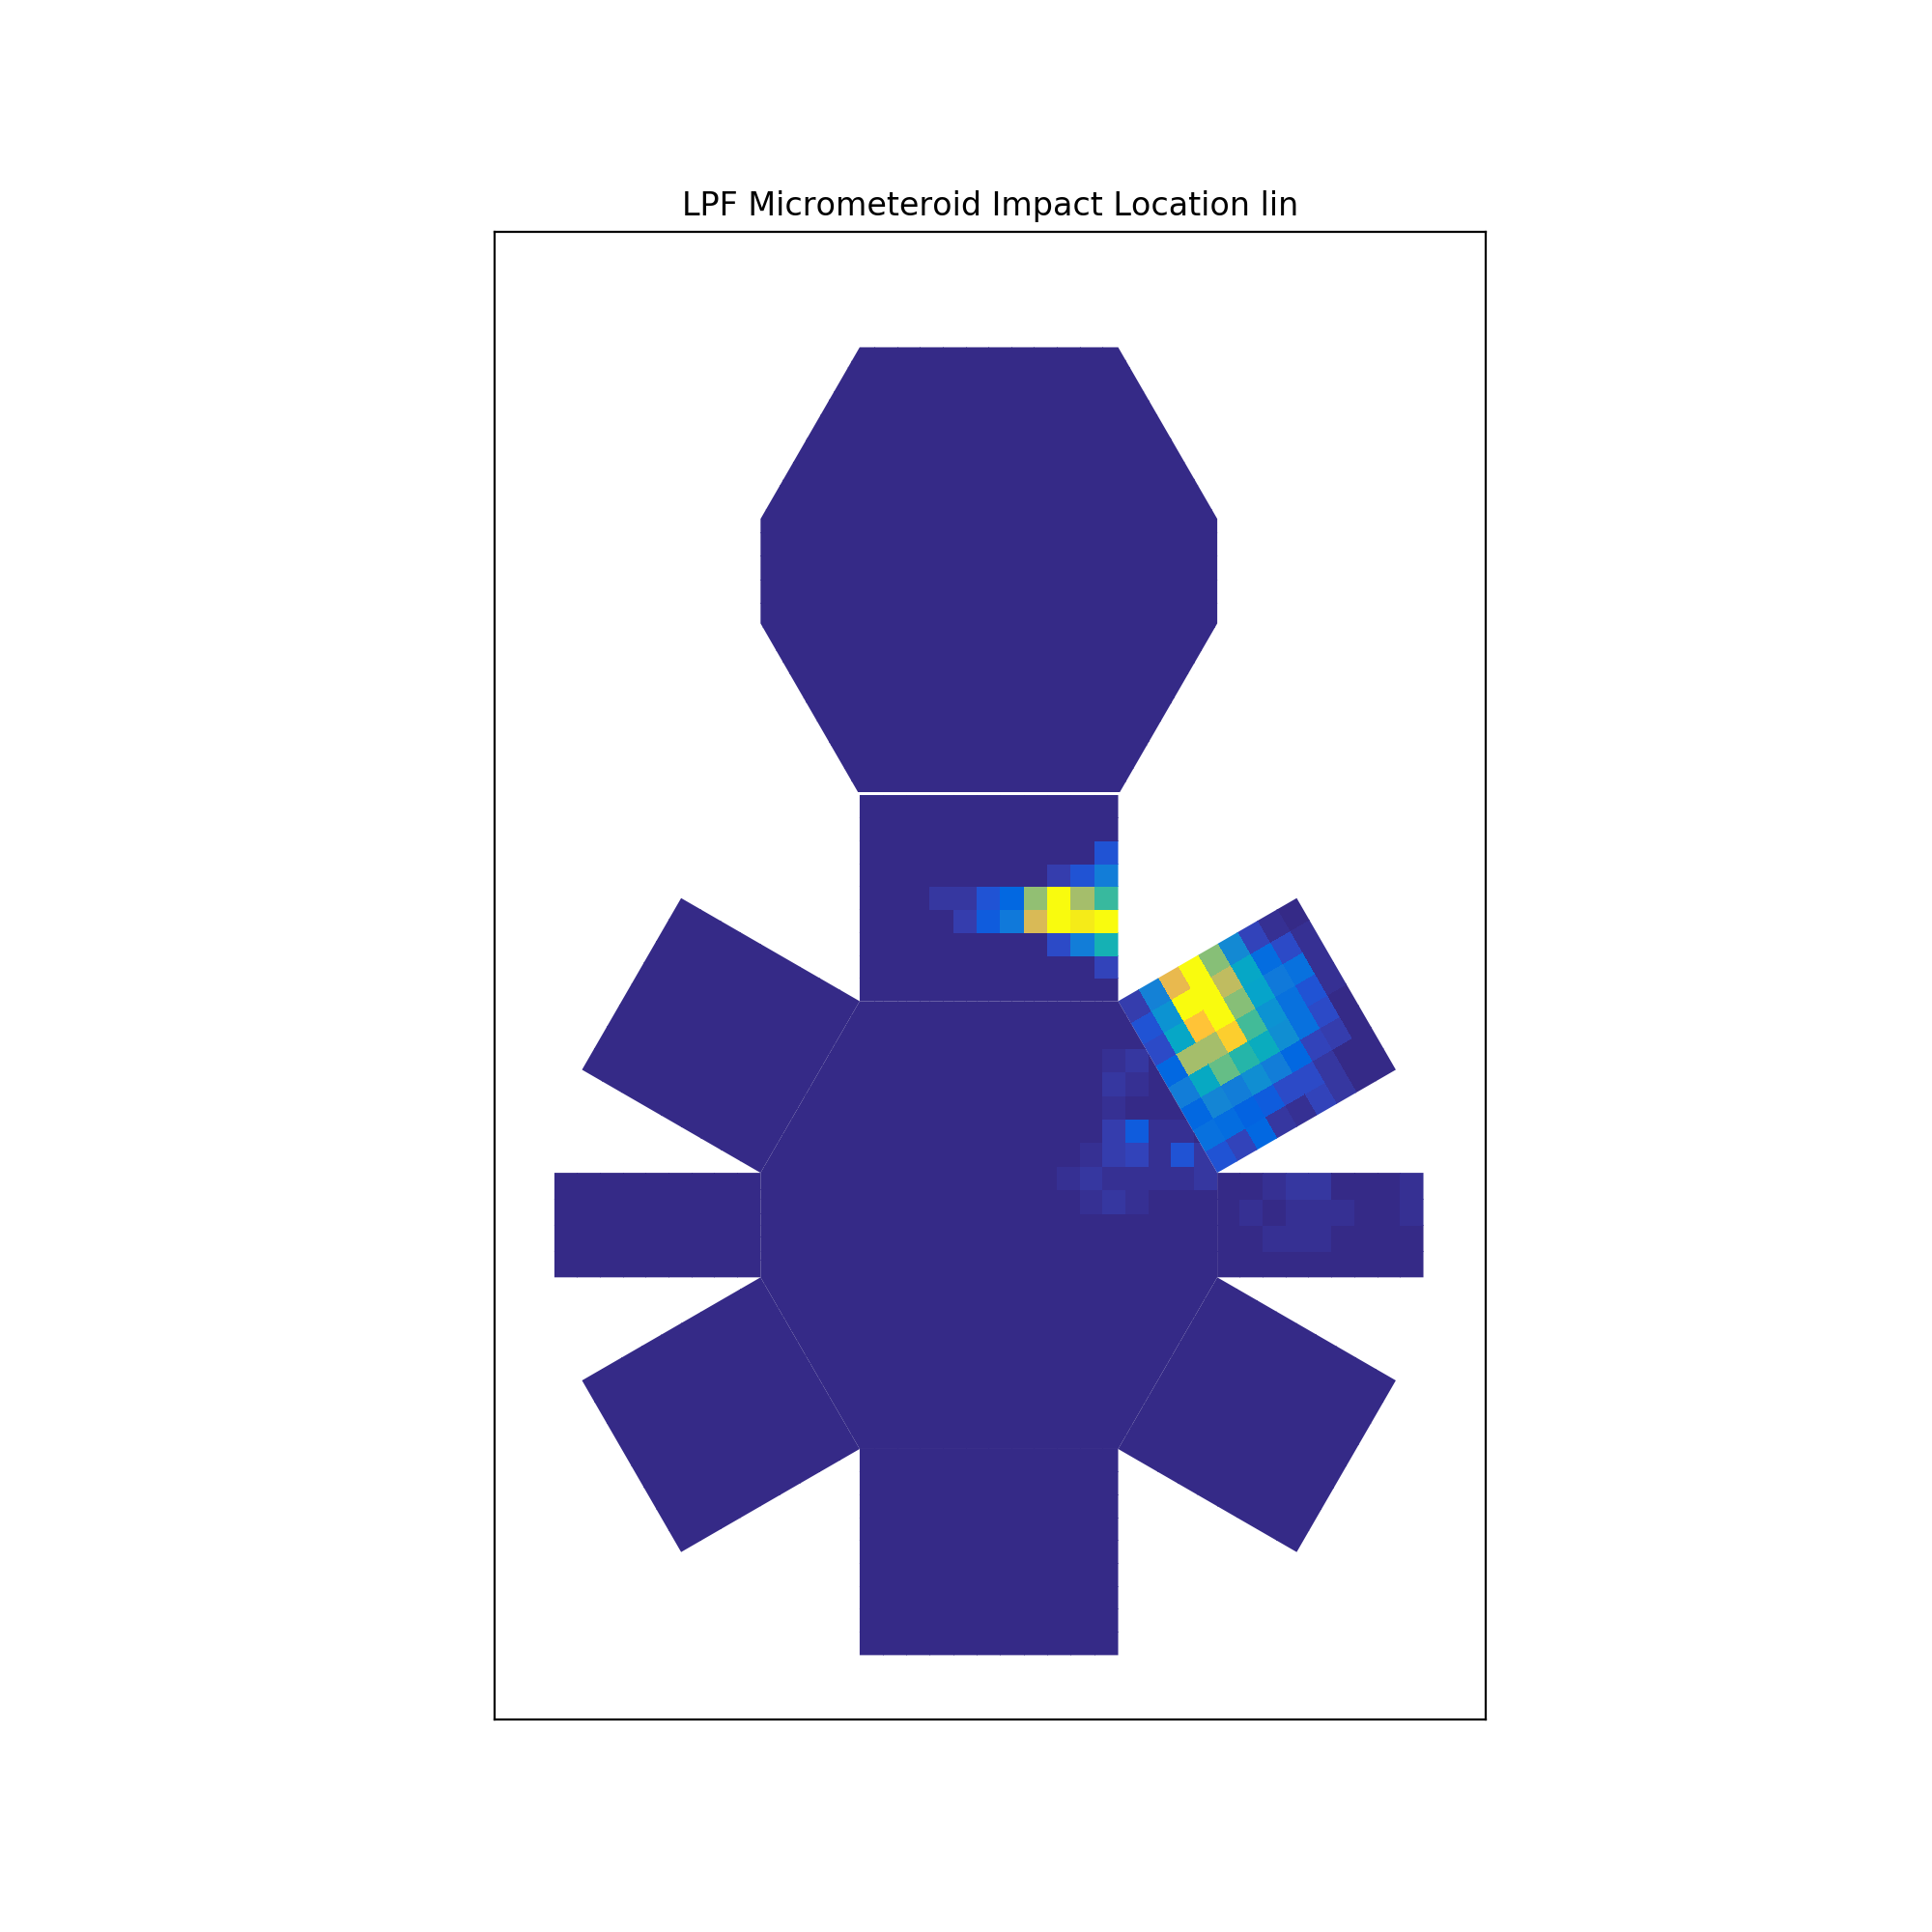

In [6]:
# Flattened LPF
print("GRS 1")
fig1 = microTools.flatten_LPF(data1, scale = 'log', legend = True)
fig1.savefig(plotDir + '/flat_LPF_log_GRS1.png',format='png')


print("GRS 2")
fig2 = microTools.flatten_LPF(data2, scale = 'lin', legend = False, N = 20, 
                              add_face_nums = False, colorbar = False)
fig2.savefig(plotDir + '/flat_LPF_lin_GRS2.png',format='png')


In [ ]:
# produce and save the dual corner plot
hf = microTools.dualCorner(data1,data2)
hf.savefig(plotDir+'/dualCorner.png',format='png')

In [ ]:
# make the skymaps in the two frames

# compute sunward sky angles
data1 = microTools.SCtoSun(data1)
data2 = microTools.SCtoSun(data2)

# make skymaps for GRS1
data1 = microTools.findSkyAngles(data1)
hp.mollview(data1['healPix'],
            cmap='OrRd', 
            cbar = False, 
            title='GRS1 Impact direction posterior for ' + str(int(data1['gps']))+ ' [spacecraft]')
hp.graticule()
hf = plt.gcf()
hf.savefig(plotDir+'/sky_SC1.png',format='png')

hp.mollview(data1['healPix_sun'],
            cmap='OrRd', 
            cbar = False, 
            title='GRS1 Impact direction posterior for ' + str(int(data1['gps']))+ ' [Sun]')
hp.graticule()
hf = plt.gcf()
hf.savefig(plotDir+'/sky_sun1.png',format='png')


# make skymaps for GRS2
data2 = microTools.findSkyAngles(data2)
hp.mollview(data2['healPix'],
            cmap='OrRd', 
            cbar = False, 
            title='GRS2 Impact direction posterior for ' + str(int(data2['gps']))+ ' [spacecraft]')
hp.graticule()
hf = plt.gcf()
hf.savefig(plotDir+'/sky_SC2.png',format='png')


hp.mollview(data2['healPix_sun'],
            cmap='OrRd', 
            cbar = False, 
            title='GRS2 Impact direction posterior for ' + str(int(data2['gps']))+ ' [Sun]')
hp.graticule()
hf = plt.gcf()
hf.savefig(plotDir+'/sky_sun2.png',format='png')



In [ ]:
# print the table string (just a check)
tabStr = microTools.summaryString(data1)
print(tabStr)